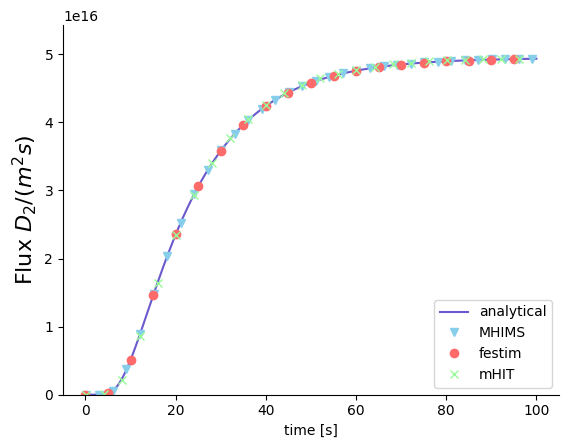

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
l = 1E-3
n_t = 1000
E_1 = 1
rhow = 6.3382E28
N_Tis = 6 * rhow
T = 1000
k_B = 8.617333E-5

# Load data
a = np.loadtxt('Flux1EvTrap1.txt')
b = np.loadtxt('Weak_flux_festim.txt')
mhims=pd.read_csv('flux_bulk_2.out',  delim_whitespace=True)  
time = a[:, 0]
D = 1.9E-7 * np.exp(-0.2 / k_B / T)
S = 2.9E-5 * np.exp(-1 / k_B / T)
N_A_const = 6.022E23
c0m = (1E5)**0.5 * S * 1.0525E5

# Calculate zeta
zeta = (N_Tis * np.exp((0.2 - 1) / (k_B * T)) + c0m * N_A_const) / (rhow * 1E-3)
Deff = D / (1 + 1 / zeta)

# Calculate flux
flux = np.ones(len(time))
for m in range(1, 10001):
    add = 2 * (-1)**m * np.exp(-m**2 * np.pi**2 * Deff * time / l**2)
    flux += add
flux = flux * c0m * D / l

#update data names
new_column_names = {
    'time(s)': 'Time',
    'N_conf_rec*flux_bulk(molecule.m-2s-1)': 'Flux'
}

mhims.rename(columns=new_column_names, inplace=True)
time_column = mhims['Time']  # Replace 'Time' with the actual column name for time
flux_column = mhims['Flux'] 
mhims=mhims.iloc[::30]


# Plot results
plt.plot(time, flux * 6.022E23 / 2,color='#6A5ACD',label='analytical')
plt.plot(mhims['Time'],mhims['Flux'],'v',label='MHIMS',color='#87CEEB')
plt.plot(b[::500, 0], b[::500, 1], 'o',label='festim',color='#FF6B6B')
plt.plot(a[::40, 0], a[::40, 1] , 'x',label='mHIT',color='#98FB98')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.title('H Flux on the other side of a slab with constant concentration interface - weak trap')
plt.xlabel('time [s]')
plt.ylabel(r'Flux $D_2 /(m^{2} s)}$', size=16)
plt.legend(loc="lower right")
plt.ylim([1E-15, flux[-1] * 1.1 * 6.022E23 / 2])
plt.savefig('WeakTrap.jpg',dpi=450)
